# Análisis de Regresión Lineal

In [1]:
#librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Datos
X=[27, 61, 37, 23, 46, 58, 29, 36, 64, 40]
Y=[15, 6, 10, 18, 9, 7, 14, 11, 5, 8]

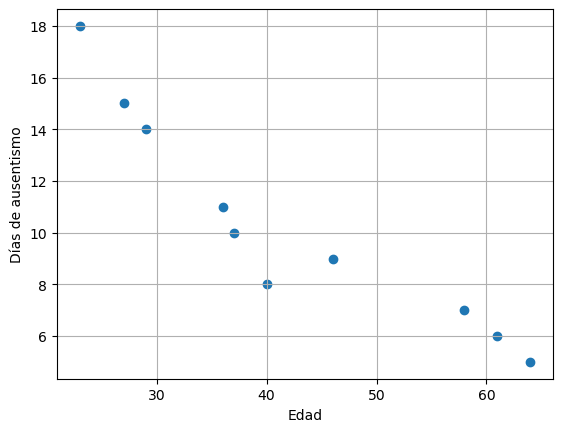

In [3]:
#Diagrama de Dispersión
plt.scatter(X,Y)
plt.xlabel("Edad")
plt.ylabel("Días de ausentismo")
plt.grid(True)
plt.show()

In [4]:
import numpy as np

# Datos como arreglos
X = np.array(X)
Y = np.array(Y)

# Tamaño
n = len(X)

# Medias
X_m = np.mean(X)
Y_m = np.mean(Y)

# Coeficiente de correlación de Pearson
r = np.corrcoef(X, Y)[0, 1]

# Coeficientes de la recta
beta_1 = np.sum((X - X_m)*(Y - Y_m)) / np.sum((X - X_m)**2)
beta_0 = Y_m - beta_1 * X_m

# R-cuadrada
R2 = r**2

# Mostrar resultados
print(f"Media de X: {X_m:.2f}")
print(f"Media de Y: {Y_m:.2f}")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R²): {R2:.4f}")
print(f"Recta de regresión: ŷ = {beta_0:.2f} + {beta_1:.2f}·X")


Media de X: 42.10
Media de Y: 10.30
Coeficiente de correlación (r): -0.9325
Coeficiente de determinación (R²): 0.8696
Recta de regresión: ŷ = 21.59 + -0.27·X


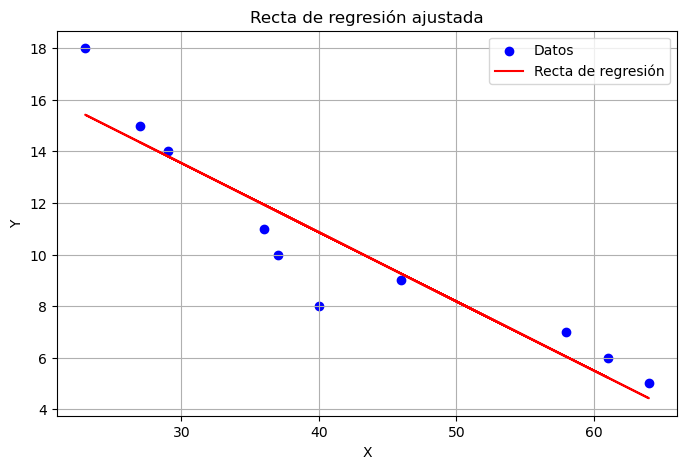

In [5]:
import matplotlib.pyplot as plt

# Valores predichos
Y_pred = beta_0 + beta_1 * X

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Datos', color='blue')
plt.plot(X, Y_pred, color='red', label='Recta de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Recta de regresión ajustada')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Error cuadrático medio
mse = np.mean((Y - Y_pred)**2)

print(f"Error cuadrático medio (MSE): {mse:.3f}")

Error cuadrático medio (MSE): 2.087


# Regresión con Python

In [7]:
import statsmodels.api as sm

# Agregar columna de unos al array X
X_with_const = sm.add_constant(X)

# Ajustar modelo OLS
modelo = sm.OLS(Y, X_with_const).fit()

# Resumen
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     53.37
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           8.35e-05
Time:                        19:42:43   Log-Likelihood:                -17.868
No. Observations:                  10   AIC:                             39.74
Df Residuals:                       8   BIC:                             40.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5874      1.627     13.265      0.0

C:\Users\reyes\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Coeficientes del modelo
print(modelo.params)

# Acceder individualmente
beta_0 = modelo.params[0]   # intercepto
print(beta_0)
beta_1 = modelo.params[1]   # pendiente
print(beta_1)

[21.5873819  -0.26810883]
21.587381898910618
-0.2681088337033401


In [9]:
# Predicciones con los mismos X usados en el ajuste
Y_pred_ = modelo.predict(X_with_const)
print(Y_pred_)

[14.34844339  5.23274304 11.66735505 15.42087872  9.25437555  6.03706954
 13.81222572 11.93546389  4.42841654 10.86302855]


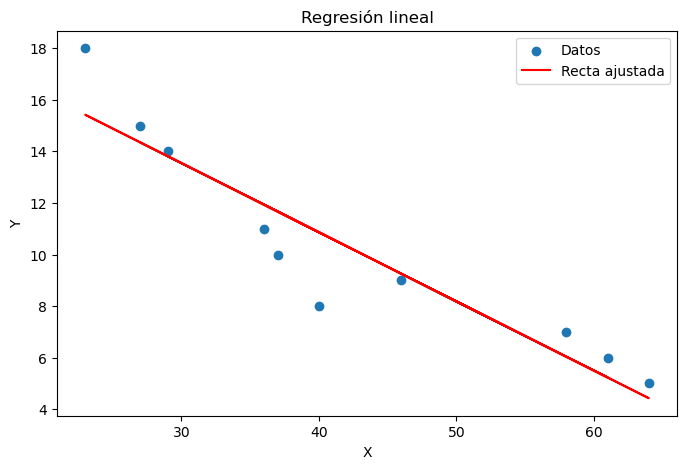

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Datos")
plt.plot(X, Y_pred_, color="red", label="Recta ajustada")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión lineal")
plt.legend()
plt.show()


# Análisis de varianza

In [11]:
# SST: Suma total de cuadrados
SST = np.sum((Y - Y_m)**2)
print(SST)
# SSR: Suma de cuadrados de regresión (explicada)
SSR = np.sum((Y_pred - Y_m)**2)
print(SSR)
# SSE: Suma de cuadrados del error (residual)
SSE = np.sum((Y - Y_pred)**2)
print(SSE)

160.1
139.22891734214465
20.871082657855332


In [12]:
print(SSR+SSE)
print(np.isclose(SST, SSR + SSE))  # Debe ser True


160.1
True


In [13]:
#Grados de libertad
n=10
k=1


gl_reg   = k
gl_res   = n - k - 1
gl_total = n - 1

print(gl_reg,gl_res,gl_total)

1 8 9


In [14]:
#Variabilidad media
MSR = SSR / gl_reg
print(MSR)
MSE = SSE / gl_res
print(MSE)

139.22891734214465
2.6088853322319165


In [15]:
#Estadístico F
F = MSR / MSE
print(F)

53.36720461494316


In [21]:
print(gl_reg)
print(gl_res)

1
8


### p-valor con dos librerías distintas

In [16]:
from scipy.stats import f

p_valor = 1 - f.cdf(F, gl_reg, gl_res)
print(p_valor)

8.346015920479566e-05


In [22]:
from scipy.stats import f
p_valor = f.sf(F, gl_reg, gl_res)
print(p_valor)

8.346015920483542e-05


### Anova con statsmodels

In [17]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Datos en DataFrame
df = pd.DataFrame({"X": X, "Y": Y})

# Ajuste por fórmula
modelo = smf.ols("Y ~ X", data=df).fit()

# Tabla ANOVA (tipo I)
anova_tbl = sm.stats.anova_lm(modelo, typ=1)
print(anova_tbl)


           df      sum_sq     mean_sq          F    PR(>F)
X         1.0  139.228917  139.228917  53.367205  0.000083
Residual  8.0   20.871083    2.608885        NaN       NaN


# Supuestos

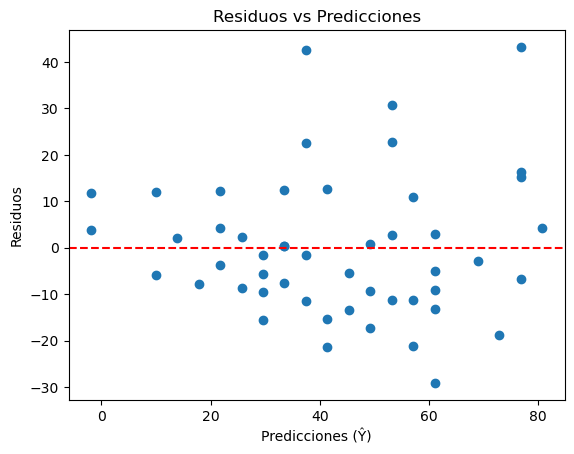

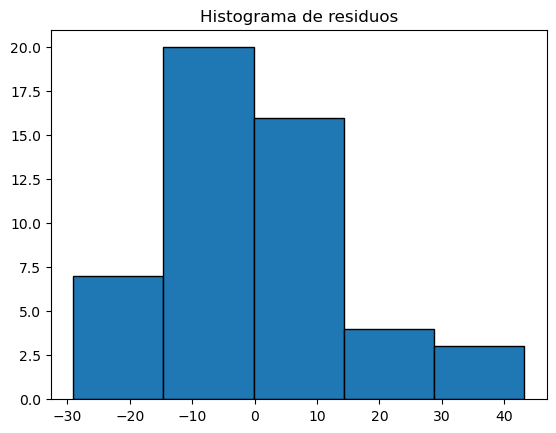

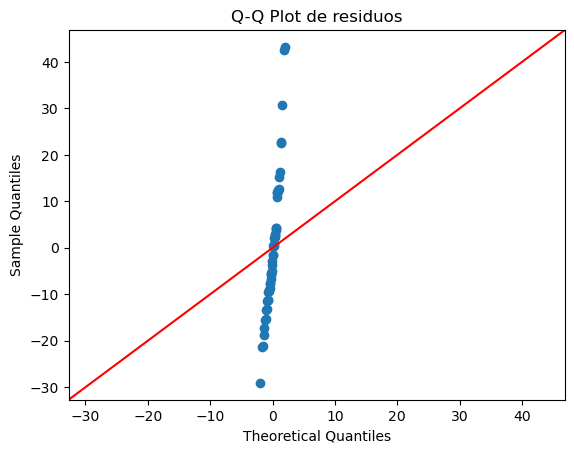

Estadístico Shapiro-Wilk: 0.9450908899307251
p-valor: 0.02152523212134838
Se rechaza normalidad (residuos no normales)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro


# Ajustar modelo
X_const = sm.add_constant(X)
modelo = sm.OLS(Y, X_const).fit()
Y_pred = modelo.predict(X_const)
residuos = Y - Y_pred

# Residuos vs Predicciones
plt.scatter(Y_pred, residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones (Ŷ)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# Histograma y Q-Q plot
plt.hist(residuos, bins=5, edgecolor="black")
plt.title("Histograma de residuos")
plt.show()

sm.qqplot(residuos, line='45')
plt.title("Q-Q Plot de residuos")
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
stat, p_val = shapiro(residuos)
print("Estadístico Shapiro-Wilk:", stat)
print("p-valor:", p_val)
if p_val > 0.05:
    print("No se rechaza normalidad (residuos ~ normales)")
else:
    print("Se rechaza normalidad (residuos no normales)")


# Ejercicio

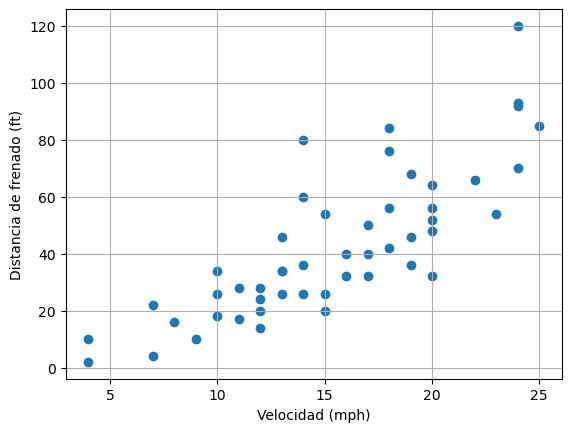

In [18]:
import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("cars.csv")
plt.scatter(df["speed"], df["dist"])
plt.xlabel("Velocidad (mph)"); plt.ylabel("Distancia de frenado (ft)")
plt.grid(True)
plt.show()


In [19]:
import numpy as np

# Cargar datos
df = pd.read_csv("cars.csv")

# Convertir a arrays
X = df["speed"].values
Y = df["dist"].values

print(X)
print(Y)

[ 4  4  7  7  8  9 10 10 10 11 11 12 12 12 12 13 13 13 13 14 14 14 14 15
 15 15 16 16 17 17 17 18 18 18 18 19 19 19 20 20 20 20 20 22 23 24 24 24
 24 25]
[  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85]
